# Student Performance Predictor

## Import Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Importing Dataset

In [164]:
df = pd.read_csv('../data/math_subject_grade_prediction.csv')

### Feature Engineering

In [166]:
df['Past_Performance_Grade'] = (df.G1 + df.G2) / 2
df['Parents_Education'] = (df.Medu + df.Fedu) / 2
df['Alcohol_Consumption'] = (df.Walc + df.Dalc)

In [167]:
df.drop(['school', 'sex','G1', 'G2', 'Medu', 'Fedu', 'Dalc', 'Walc', 'guardian', 'reason'], 
        axis=1, inplace=True)

In [169]:
df.columns=['Age', 'Locality', 'Family_Size', 'Parents_Cohab_Status', 'Mother_Job',
            'Father_Job', 'Home_to_School_Travel_Time', 'Weekly_Study_Time', 'Past_Class_Failure_Count', 
            'School_Support', 'Family_Support', 'Extra_Paid_Classes', 'Extra_Curr_Activities', 
            'Attended_Kindergarten', 'Higher_Edu', 'Internet', 'Dating', 'Family_Relationship', 
            'Freetime_After_School', 'Goes_Out', 'Current_Health_Status', 'School_Absences', 
            'Final_Grade', 'Past_Grade_Record', 'Parents_Education', 'Alcohol_Consumption']

### Feature Encoding

In [28]:
# natural order in values
ord_cols = ['Parents_Cohab_Status', 'Family_Size', 'Attended_Kindergarten', 'Extra_Curr_Activities', 
           'Father_Job', 'Mother_Job', 'Family_Support', 'School_Support', 'Locality', 'Higher_Edu', 
            'Dating', 'Extra_Paid_Classes', 'Internet']

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [30]:
ord_enc_cols = ord_enc.fit_transform(df[ord_cols])
print(ord_enc_cols.shape, len(ord_cols))
df[ord_cols] = ord_enc_cols

(395, 13) 13


In [32]:
df.head()

,Age,Locality,Family_Size,Parents_Cohab_Status,Mother_Job,Father_Job,Home_to_School_Travel_Time,Weekly_Study_Time,Past_Class_Failure_Count,School_Support,...,Dating,Family_Relationship,Freetime_After_School,Goes_Out,Current_Health_Status,School_Absences,Final_Grade,Past_Grade_Record,Parents_Education,Alcohol_Consumption
0,18.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,1.0,...,0.0,4.0,3.0,4.0,3.0,6.0,6.0,5.5,4.0,2.0
1,17.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,...,0.0,5.0,3.0,3.0,3.0,4.0,6.0,5.0,1.0,2.0
2,15.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,0.0,4.0,3.0,2.0,3.0,10.0,10.0,7.5,1.0,5.0
3,15.0,1.0,0.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,...,1.0,3.0,2.0,2.0,5.0,2.0,15.0,14.5,3.0,2.0
4,16.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,...,0.0,4.0,3.0,2.0,5.0,4.0,10.0,8.0,3.0,3.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         395 non-null    float32
 1   Locality                    395 non-null    float32
 2   Family_Size                 395 non-null    float32
 3   Parents_Cohab_Status        395 non-null    float32
 4   Mother_Job                  395 non-null    float32
 5   Father_Job                  395 non-null    float32
 6   Home_to_School_Travel_Time  395 non-null    float32
 7   Weekly_Study_Time           395 non-null    float32
 8   Past_Class_Failure_Count    395 non-null    float32
 9   School_Support              395 non-null    float32
 10  Family_Support              395 non-null    float32
 11  Extra_Paid_Classes          395 non-null    float32
 12  Extra_Curr_Activities       395 non-null    float32
 13  Attended_Kindergarten       395 non

### Visualizing Feature Correlations

In [34]:
corr_matrix = df.corr()

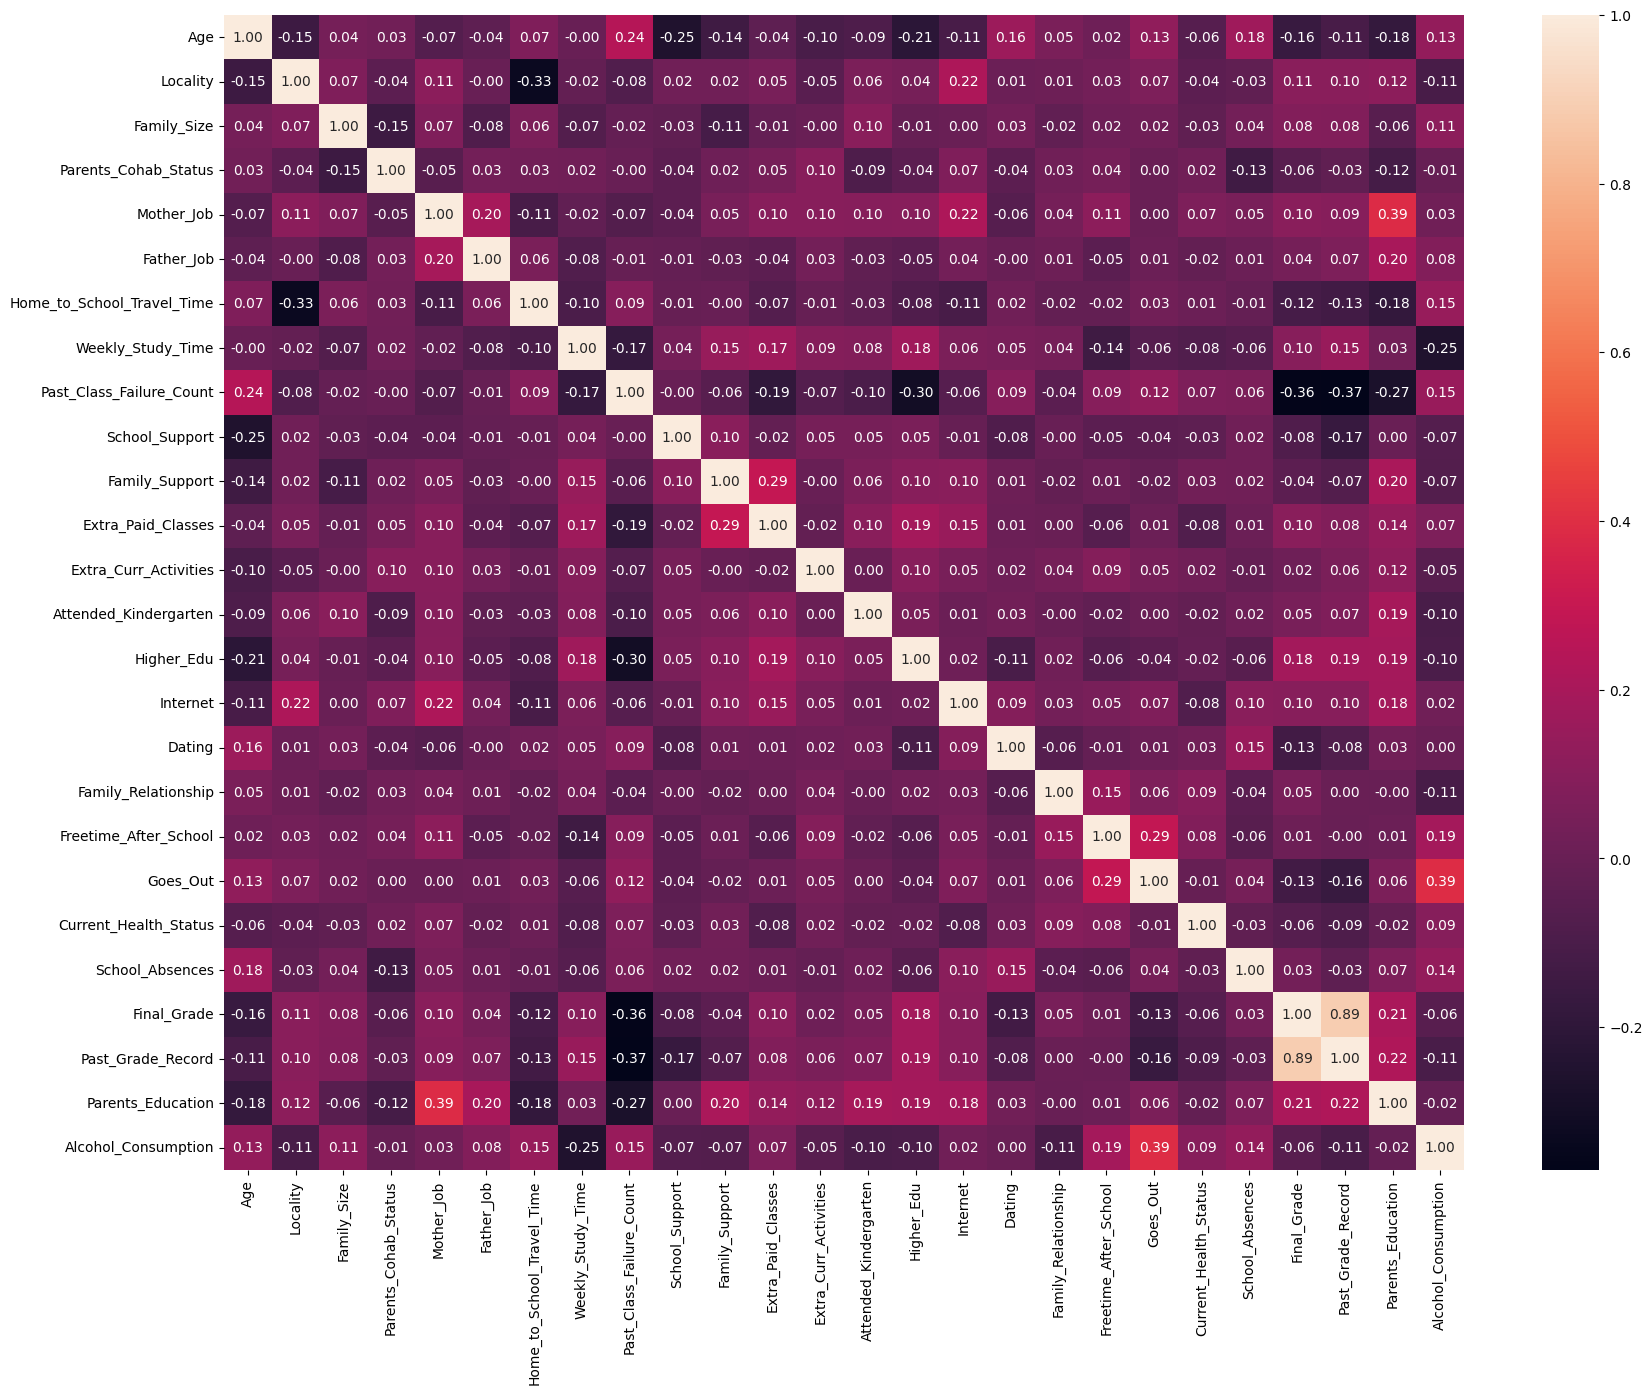

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

### Dataset Splitting into Train and Test Sets

In [163]:
X = df.drop(['Final_Grade'], axis=1)
Y = df['Final_Grade']

### Feature Selection

In [60]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
k_best = SelectKBest(mutual_info_regression, k='all')
selected_cols = k_best.fit(X, Y)
X_k_new = k_best.fit_transform(X, Y)

In [61]:
feature_scores = {}

for col, score in zip(X.columns, k_best.scores_):
    feature_scores[col] = round(float(score), 2)

In [62]:
feature_scores = dict(sorted(feature_scores.items(), key=lambda item: item[1], reverse=True))

In [155]:
selected_features = ['Past_Grade_Record', 'School_Absences', 'Past_Class_Failure_Count', 'Extra_Paid_Classes', 
                     'Family_Relationship',  'Goes_Out', 'Mother_Job', 'Weekly_Study_Time', 'School_Support', 
                     'Alcohol_Consumption', 'Father_Job',  'Freetime_After_School', 'Higher_Edu', 'Age', 
                     'Parents_Education']

In [156]:
len(selected_features)

15

In [157]:
X_new = df[selected_features]

In [158]:
X_new.head(2)

,Past_Grade_Record,School_Absences,Past_Class_Failure_Count,Extra_Paid_Classes,Family_Relationship,Goes_Out,Mother_Job,Weekly_Study_Time,School_Support,Alcohol_Consumption,Father_Job,Freetime_After_School,Higher_Edu,Age,Parents_Education
0,5.5,6.0,0.0,0.0,4.0,4.0,0.0,2.0,1.0,2.0,4.0,3.0,1.0,18.0,4.0
1,5.0,4.0,0.0,0.0,5.0,3.0,0.0,2.0,0.0,2.0,2.0,3.0,1.0,17.0,1.0


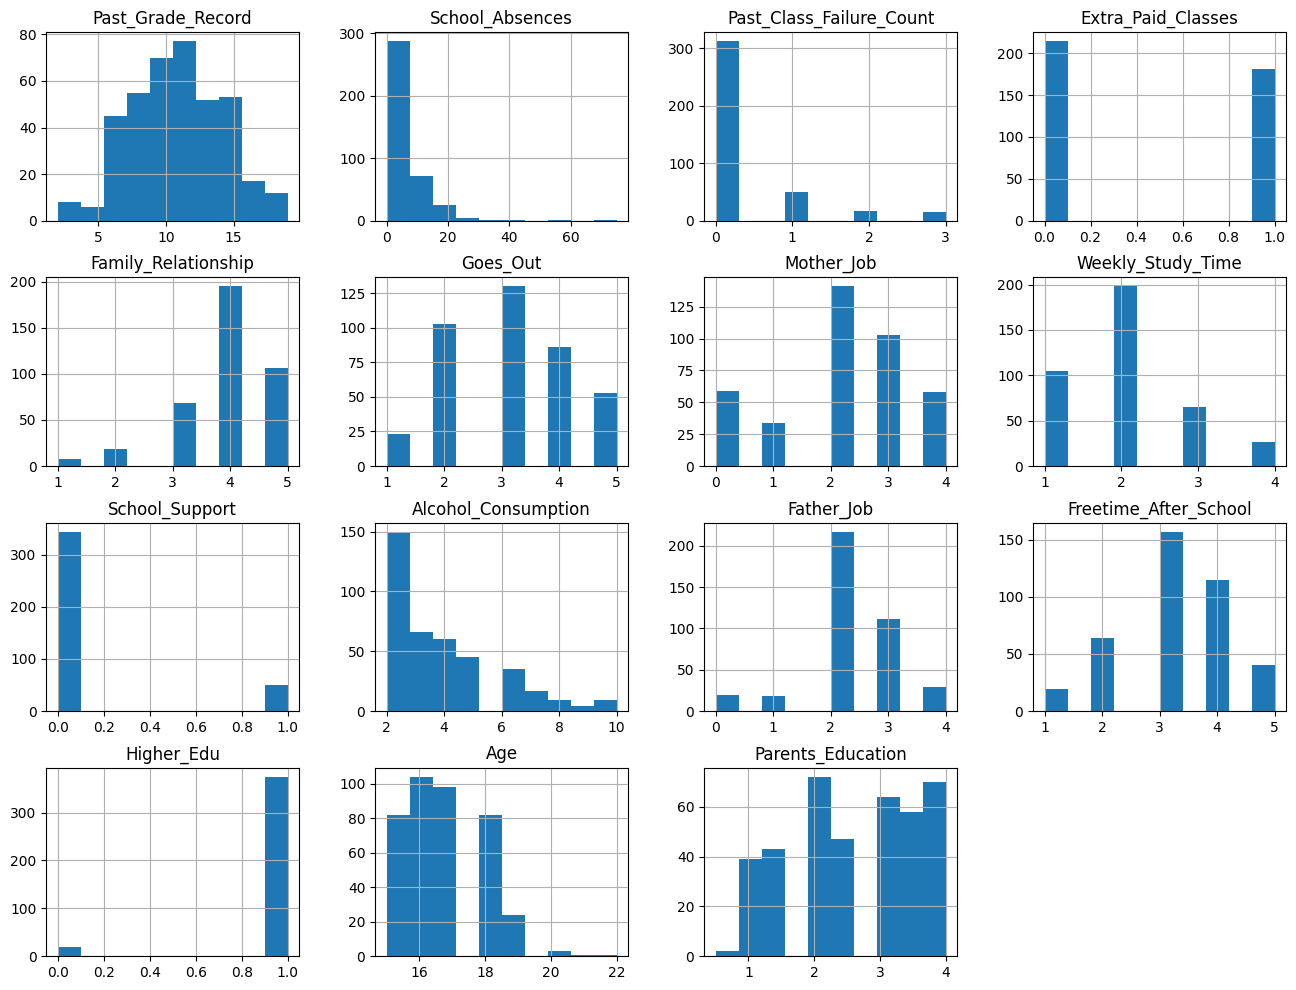

In [159]:
X_new.hist(figsize=(16, 12))
plt.show()

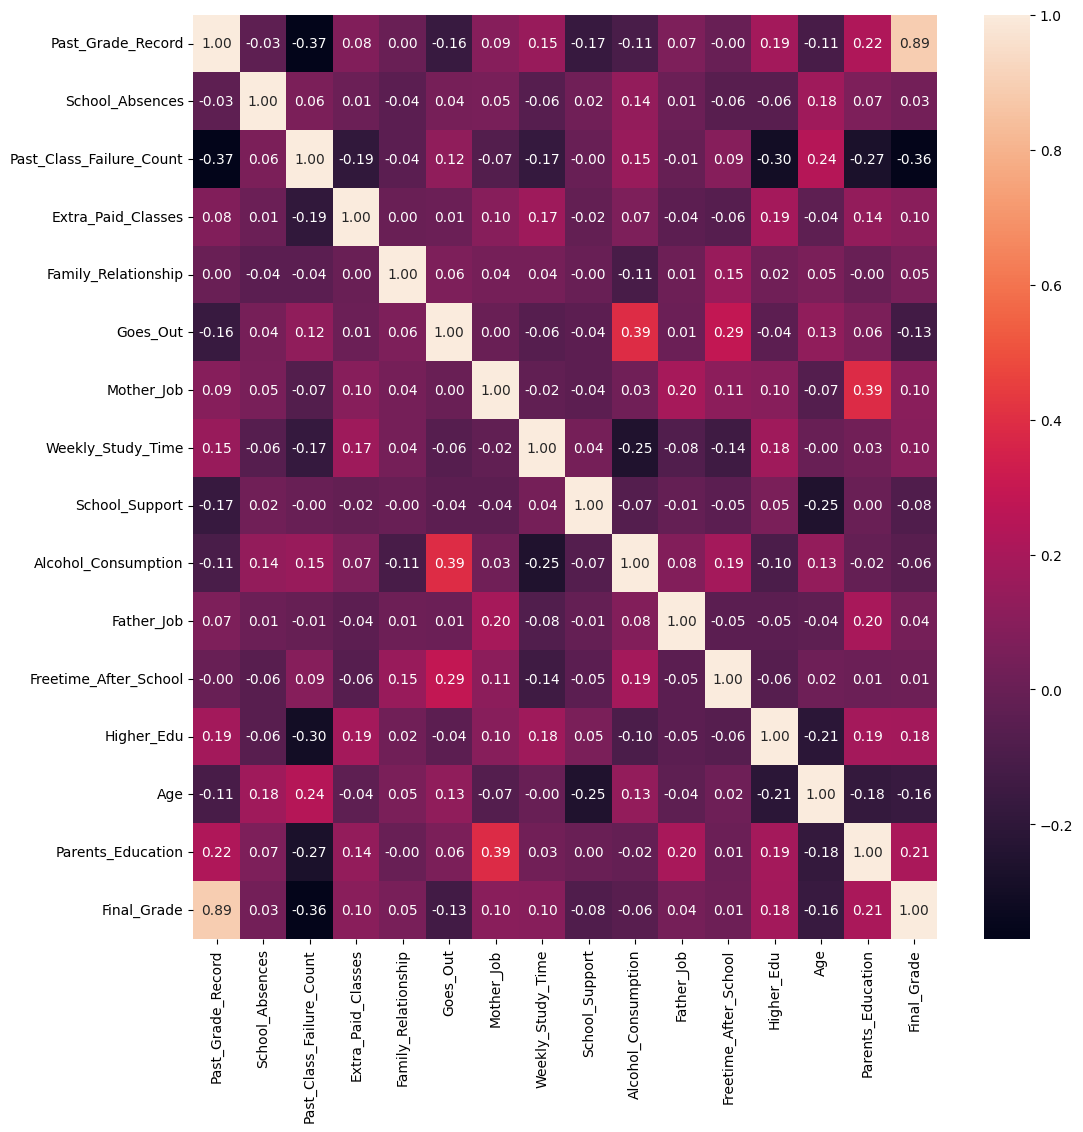

In [160]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.merge(X_new, Y, left_index=True, right_index=True).corr(), fmt='.2f', annot=True)
plt.show()

### Dataset Scaling

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [162]:
x_train.columns

Index(['Past_Grade_Record', 'School_Absences', 'Past_Class_Failure_Count',
       'Extra_Paid_Classes', 'Family_Relationship', 'Goes_Out', 'Mother_Job',
       'Weekly_Study_Time', 'School_Support', 'Alcohol_Consumption',
       'Father_Job', 'Freetime_After_School', 'Higher_Edu', 'Age',
       'Parents_Education'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer
rob_scaler = RobustScaler()  # ---> highest RFR performance (RFR model performs best) 
quant_transformer = QuantileTransformer()

# x_train_scaled = rob_scaler.fit_transform(x_train)
# x_test_scaled = rob_scaler.transform(x_test)
x_train_scaled = quant_transformer.fit_transform(x_train[['Past_Grade_Record', 'School_Absences', 
                                                          'Past_Class_Failure_Count', 'Extra_Paid_Classes', 
                                                          'Family_Relationship', 'Goes_Out', 'Mother_Job', 
                                                          'Weekly_Study_Time', 'School_Support', 
                                                          'Alcohol_Consumption', 'Father_Job', 
                                                          'Freetime_After_School', 'Higher_Edu', 'Age', 
                                                          'Parents_Education']])

x_test_scaled = quant_transformer.transform(x_test[['Past_Grade_Record', 'School_Absences', 
                                                    'Past_Class_Failure_Count', 'Family_Relationship', 
                                                    'Goes_Out', 'Weekly_Study_Time','Alcohol_Consumption']])

a:\AI-Projects\tools\miniconda3\envs\stats_ml\lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (316). n_quantiles is set to n_samples.
  warnings.warn(


In [136]:
x_train[['Past_Grade_Record', 'School_Absences','Past_Class_Failure_Count', 'Family_Relationship', 
         'Goes_Out', 'Weekly_Study_Time','Alcohol_Consumption']] = x_train_scaled

x_test[['Past_Grade_Record', 'School_Absences', 'Past_Class_Failure_Count', 'Family_Relationship', 
        'Goes_Out', 'Weekly_Study_Time','Alcohol_Consumption']] = x_test_scaled 

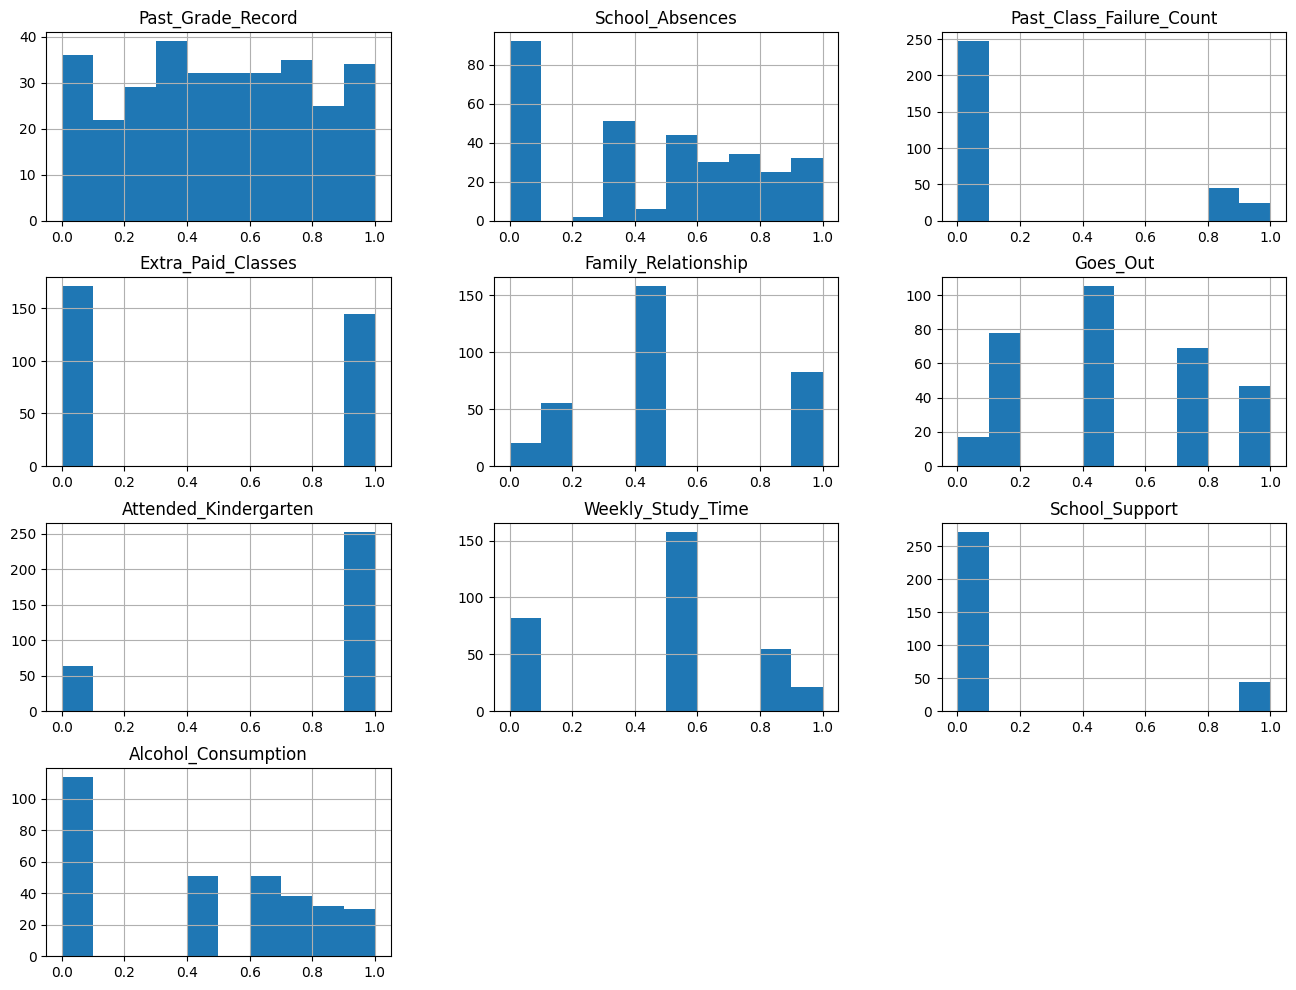

In [137]:
x_train.hist(figsize=(16, 12))
plt.show()

In [103]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

### Model Training

In [138]:
lr = LinearRegression()
hgbr = HistGradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
abr = AdaBoostRegressor()
knr = KNeighborsRegressor()

In [139]:
lr.fit(x_train, y_train)
hgbr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
abr.fit(x_train, y_train)
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [141]:
lr_preds = lr.predict(x_test)
hgbr_preds = hgbr.predict(x_test)
rfr_preds = rfr.predict(x_test)
abr_preds = abr.predict(x_test)
knr_preds = knr.predict(x_test)

In [142]:
from sklearn.metrics import r2_score, mean_absolute_error

In [146]:
print(f'LR Accuracy: {round(r2_score(y_test, lr_preds), 3)*100}%')
print(f'RFR Accuracy: {round(r2_score(y_test, rfr_preds), 2)*100}%')
print(f'HGBR Accuracy: {round(r2_score(y_test, hgbr_preds), 3)*100}%')
print(f'ABR Accuracy: {round(r2_score(y_test, abr_preds), 3)*100}%')
print(f'KNR Accuracy: {round(r2_score(y_test, knr_preds), 3)*100}%')

LR Accuracy: 73.7%
RFR Accuracy: 80.0%
HGBR Accuracy: 78.8%
ABR Accuracy: 75.2%
KNR Accuracy: 52.0%


In [ ]:
from pickle import dump

# with open('../models/trained_rfr_model.pkl', 'wb') as f:
#     dump(rfr, f)

# with open('../models/trained_hgbr_model.pkl', 'wb') as f:
#     dump(hgbr, f)

# with open('../models/trained_abr_model.pkl', 'wb') as f:
#     dump(abr, f)

In [147]:
mean_absolute_error(y_test, rfr_preds)

1.2665822784810126

### Test for variance and bias

In [99]:
# 1. predicting the y_train values to test the bias level
y_train_pred = rfr.predict(x_train_scaled)
print(f'RFR_rob_train Accuracy: {round(r2_score(y_train, y_train_pred), 5)*100}%')

# 2. predicting the y_test values to test the variance level
print(f'RFR_rob_test Accuracy: {round(r2_score(y_test, rfr_preds), 4)*100}%')

# low bias and somewhat higher variance suggests possible overfitting tendency of model.

RFR_rob_train Accuracy: 97.585%
RFR_rob_test Accuracy: 84.23%


### Plotting the predictions vs original target values

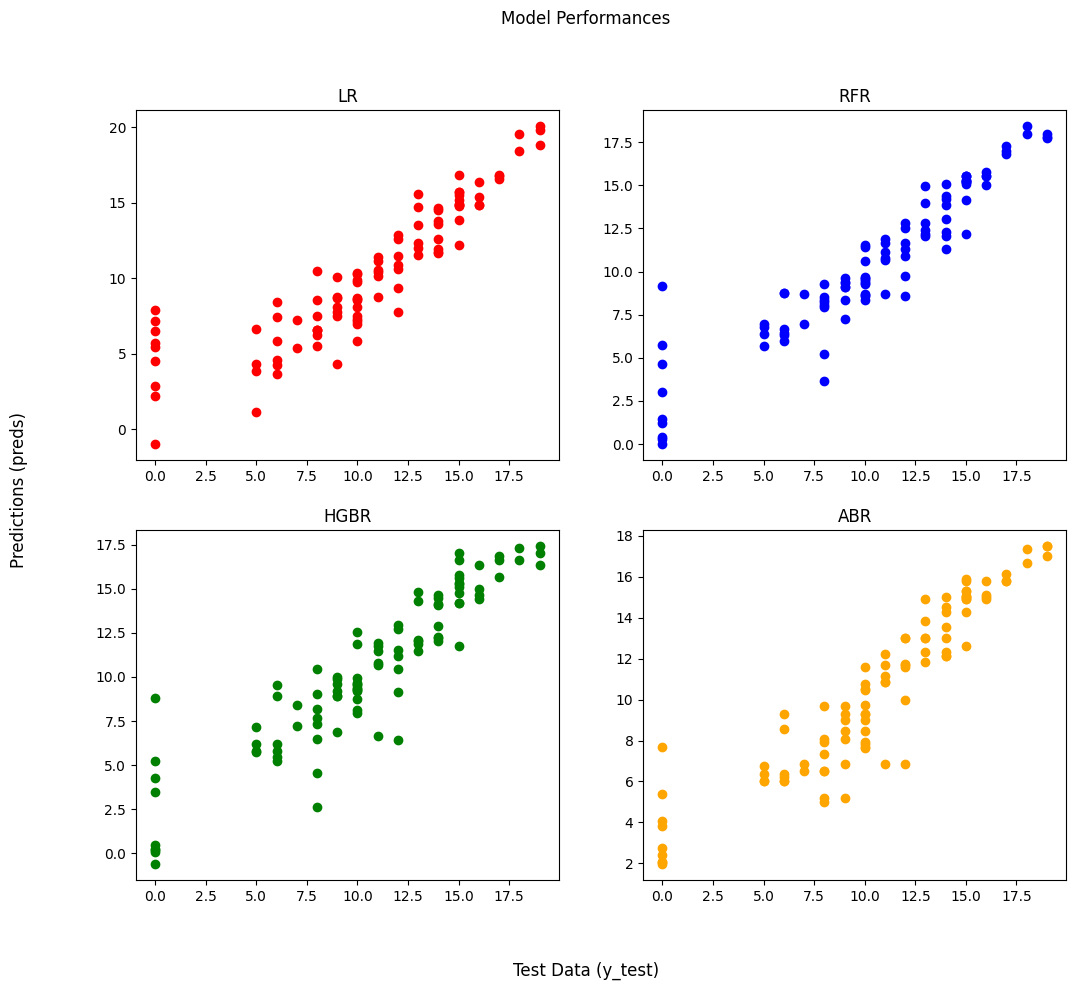

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('Model Performances')
fig.supxlabel('Test Data (y_test)')
fig.supylabel('Predictions (preds)')

axs[0][0].scatter(y_test, lr_preds, color='red')
axs[0][0].set_title('LR')
axs[0][1].scatter(y_test, rfr_preds, color='blue')
axs[0][1].set_title('RFR')
axs[1][0].scatter(y_test, hgbr_preds, color='green')
axs[1][0].set_title('HGBR')
axs[1][1].scatter(y_test, abr_preds, color='orange')
axs[1][1].set_title('ABR')

plt.savefig('../reports/Models_Performance.png')